## Importing Libraries

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

# To generate the for loops
import glob
import os
from matplotlib import ticker

## Reading the data

In [2]:
# Get the data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

dfs = []
min = []
k = 0
for file in files:
    k = k +1
    if k > 2:
        break
    df = pd.read_excel(file) # reading the excel file
    
    mice_min = df.iloc[:,0] #getting only the minutes
    mice_temp = df.iloc[:,3::2] # slicing the data for only temperature
    
    min.append(mice_min) # adding minutes into the list
    dfs.append(mice_temp) # adding the file into the list
  
     

## SVM for each dataset

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

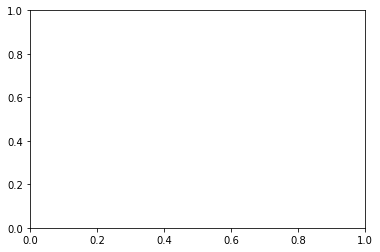

In [10]:
fig,ax = plt.subplots()
fig.set_facecolor("white") # Changing the border to white

model = svm.OneClassSVM() # importing the model

# Plotting each file's temperature vs. minutes
for i in range(len(min)):
    mice_min = min[i] # renaming the minutes to the current column
    mice_temp = dfs[i] # renaming the temperature to the current column
    x_axis = mice_min # defining the x axis
    
    # A for loop for the temperatures (extracting only the column of data frame)
    for j in range(mice_temp.shape[1]): 
        ax.cla() # clear axis for each individual mouse
        y_axis = mice_temp.iloc[:,j] # defining the y axis
        names = mice_temp.columns[j] # extracting the names of the columns (mouse name)
        
        # Filling in missing values using forward fill
        y1 = y_axis.fillna(method='ffill')
   
        # Extracting column names
        names = mice_temp.columns[j] 
        
        # Time Delay Embedding
        Y = tde.tde(y1) #using the tde file
        Y=Y.T #transporting the data
        
        # Fit the Data
        model.fit(Y[:721,:]) #training the data for the first 3 days (3*24*60)
                                ###need to change the ending value for Y
        # Predict the Data
        predict = model.predict(Y[721:,:]) #predicting on the rest of the days
        scores = model.score_samples(Y[721:,:]) #scoring on the rest of the days 
        
        # Plotting the Scatterplot
        ax.plot(scores[721:], label=names)
        ax.grid()
        ax.set_title("Scoring") # setting a title
        ax.set_xlabel("Minutes") # x label
        ax.set_ylabel("Score") # y label
        ax.legend() # name of the mouse
        ax.set_xlim(-5,) # x limits
        ax.set_ylim(0,800) # y limits
        
        # Values between 0 and 1
        
        
        
        
        #SAVING EACH PLOT
        filename = "Scores/%s.png"%names # saving the file as the name of the mouse
        fig.savefig(filename)
        print("Prediction for " + names, "is: \n", predict, "\n with score \n ", +  scores)